<a href="https://colab.research.google.com/github/dm-fedorov/pandas_basic/blob/master/%D0%BA%D0%B5%D0%B9%D1%81%D1%8B%20%D0%BF%D0%BE%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D1%83%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85/%D0%B7%D0%B0%D1%80%D0%BF%D0%BB%D0%B0%D1%82%D1%8B%20%D0%B2%20%D0%98%D0%A2.ipynb" target="_blank"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

В качестве более сложного примера работы с данными временных рядов рассмотрим подсчет количества велосипедов на Фримонтском мосту в Сиэтле. Эти данные поступают из автоматического счетчика велосипедов, установленного в конце 2012 года с индуктивными датчиками на восточной и западной боковых дорожках моста. Сведения о почасовом количестве велосипедов можно скачать по [адресу](https://data.seattle.gov/).

In [1]:
#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4248k    0 4248k    0     0   215k      0 --:--:--  0:00:19 --:--:--  281k


После скачивания набора данных можно воспользоваться библиотекой Pandas для чтения CSV-файла в объект DataFrame . Можно указать, что в качестве индекса мы хотим видеть объекты Date и чтобы выполнялся автоматический синтаксический разбор этих дат:

In [5]:
import pandas as pd

data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


Для удобства мы подвергнем этот набор данных дальнейшей обработке, сократив названия столбцов:

In [6]:
data.columns = ['Total', 'West', 'East']
data.head()

,Total,West,East
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


Теперь рассмотрим сводные статистические показатели для этих данных:

In [7]:
data.dropna().describe()

,Total,West,East
count,136313.000000,136313.000000,136313.000000
mean,112.975065,51.514060,61.461005
std,143.607191,66.214446,89.406687
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


Мы можем почерпнуть полезную информацию из этого набора данных, визуализировав его. Начнем с построения графика исходных данных:

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

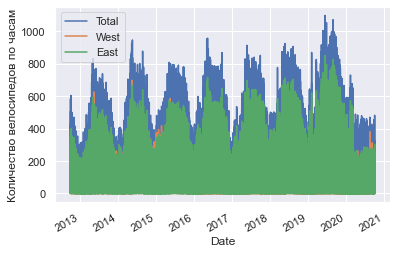

In [12]:
data.plot()
plt.ylabel('Количество велосипедов по часам'); 

Примерно 25 000 почасовых выборок — слишком плотная дискретизация, чтобы можно было понять хоть что-то. Можно почерпнуть больше информации, если выполнить передискретизацию этих данных на сетке с более крупным шагом. Вы-
полним передискретизацию с шагом одна неделя:

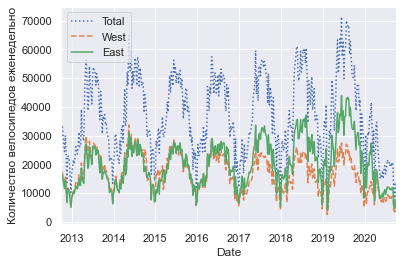

In [13]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Количество велосипедов еженедельно');

Это демонстрирует нам некоторые интересные сезонные тренды: как и следовало ожидать, летом люди ездят на велосипедах больше, чем зимой, и даже в пределах каждого из сезонов велосипеды используются с разной интенсивностью в разные недели.

Еще один удобный способ агрегирования данных — вычисление скользящего среднего с помощью функции pd.rolling_mean(). Здесь мы вычисляем для наших данных скользящее среднее за 30 дней, центрируя при этом окно:

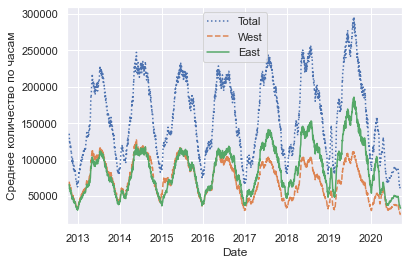

In [14]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('Среднее количество по часам');  

Причина зубчатости получившего изображения — в резкой границе окна. Более гладкую версию скользящего среднего можно получить, воспользовавшись оконной функцией, например Гауссовым окном. Следующий код задает как ширину окна (в нашем случае 50 дней), так и ширину Гауссовой функции внутри окна (в нашем случае 10 дней):

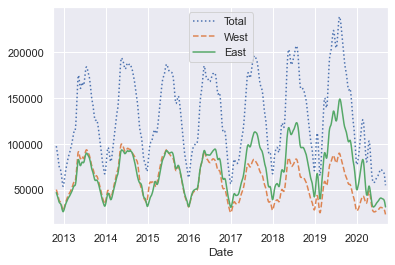

In [15]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

Хотя с помощью сглаженных представлений данных можно получить общее представление о трендах данных, они скрывают от нас многие интересные нюансы их структуры. Например, нам может понадобиться увидеть усредненное движение велосипедного транспорта как функцию от времени суток. Это можно сделать с помощью функциональности GroupBy:

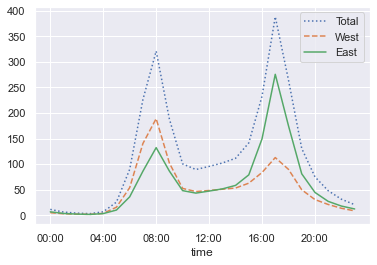

In [17]:
import numpy as np

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

Почасовое движение транспорта представляет собой строго бимодальное распределение с максимумами в 08:00 утра и 05:00 вечера. Вероятно, это свидетельствует о существенном вкладе [маятниковой миграции](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%8F%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BC%D0%B8%D0%B3%D1%80%D0%B0%D1%86%D0%B8%D1%8F) через мост. В пользу этого говорят и различия между значениями с западной боковой дорожки (обычно используемой при движении в деловой центр Сиэтла) с более выраженными утренними максимумами и значениями с восточной боковой дорожки (обычно
используемой при движении из делового центра Сиэтла) с более выраженными вечерними максимумами.

Нас могут также интересовать изменения ситуации по дням недели. Это можно выяснить с помощью операции groupby:

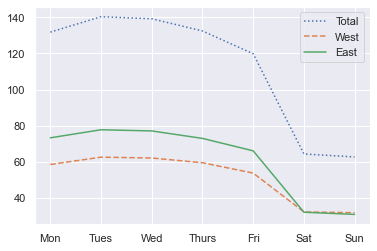

In [18]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

Этот график демонстрирует существенное различие между количеством велосипедов в будние и выходные дни: с понедельника по пятницу мост пересекает в среднем вдвое больше велосипедистов, чем в субботу и воскресенье.
С учетом этого выполним сложную операцию groupby и посмотрим на почасовой тренд в будни по сравнению с выходными. Начнем с группировки как по признаку выходного дня, так и по времени суток:

In [19]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

Теперь воспользуемся некоторыми инструментами, чтобы нарисовать два графика бок о бок:

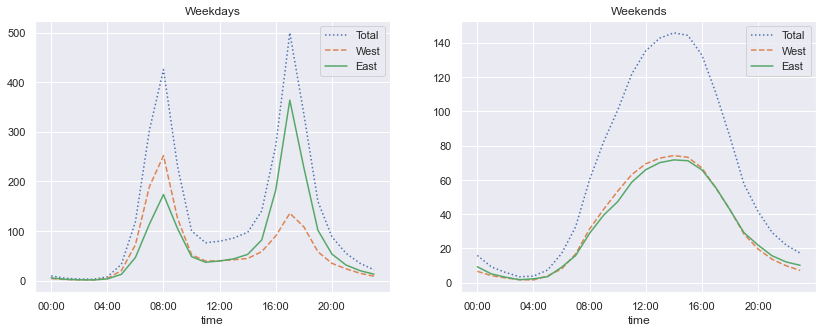

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-']);

Результат оказался очень интересным: мы видим бимодальный паттерн, связанный с поездками на работу в город на протяжении рабочей недели, и унимодальный паттерн, связанный с досугом/отдыхом во время выходных. Было бы интересно дальше покопаться в этих данных и изучить влияние погоды, температуры, времени года и других факторов на паттерны поездок в город на велосипедах. 

Дальнейшее обсуждение этих вопросов см. в сообщении [«Действительно ли в Сиэтле наблюдается оживление в сфере поездок на велосипедах?»](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/). 